In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pickle
from sklearn.model_selection import train_test_split

# Flags
PLOT_TRAIN = True
PLOT_TEST = True

In [2]:
# Load the data
with open("data/Simple_wire.pkl", 'rb') as file:
    data_dict = pickle.load(file)

# Define the input and output data
x = np.asarray(data_dict['Parameter combination'])
frequency = np.asarray(data_dict['Frequency'])
y = np.asarray(data_dict['S1,1'])


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
# x_train = x[:int(0.7*x.shape[0]), :]
# x_test = x[int(0.7*x.shape[0]):, :]

# y_train = y[:int(0.7*y.shape[0]), :]
# y_test = y[int(0.7*y.shape[0]):, :]

In [4]:
######### normalize input data
######### Note: you can also use other normalization method
xmean1 = np.mean(x_train)
xstd1 = np.std(x_train)
xmean2 = np.mean(x_test)
xstd2 = np.std(x_test)

x_train_norm = (x_train-xmean1)/xstd1
x_test_norm = (x_test-xmean1)/xstd1

########## normalize output data
######### Note: you can also use other normalization method
ymean1 = np.mean(y_train)
ystd1 = np.std(y_train)
ymean2 = np.mean(y_test)
ystd2 = np.std(y_test)

y_train_norm = (y_train-ymean1)/ystd1
y_test_norm = (y_test-ymean1)/ystd1


In [5]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(3)),
    layers.Dense(2500, activation='sigmoid', name = 'layer1'),
    layers.Dense(2000, activation='sigmoid', name = 'layer2'),
    layers.Dense(1500, activation='sigmoid', name = 'layer3'),
    layers.Dense(y_train_norm.shape[1], activation = 'linear', name = 'Output_layer')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2500)              10000     
                                                                 
 layer2 (Dense)              (None, 2000)              5002000   
                                                                 
 layer3 (Dense)              (None, 1500)              3001500   
                                                                 
 Output_layer (Dense)        (None, 1001)              1502501   
                                                                 
Total params: 9516001 (36.30 MB)
Trainable params: 9516001 (36.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=[keras.metrics.MeanSquaredError()]
)

model.fit(
    x=x_train_norm,
    y=y_train_norm,
    batch_size=100,
    epochs=10000,
    shuffle=False,
    callbacks=[keras.callbacks.History()]
)

# Define the loss and accuracy for the training and test data
loss = model.history.history['loss']
mean_error = model.history.history['mean_squared_error']

Epoch 1/10000
11/11 [==============================] - 2s 118ms/step - loss: 0.5337 - mean_squared_error: 1.1787
Epoch 2/10000
11/11 [==============================] - 1s 112ms/step - loss: 0.4661 - mean_squared_error: 1.0493
Epoch 3/10000
11/11 [==============================] - 1s 117ms/step - loss: 0.4265 - mean_squared_error: 1.0599
Epoch 4/10000
11/11 [==============================] - 1s 116ms/step - loss: 0.4093 - mean_squared_error: 1.0799
Epoch 5/10000
11/11 [==============================] - 1s 112ms/step - loss: 0.4010 - mean_squared_error: 1.0904
Epoch 6/10000
11/11 [==============================] - 1s 121ms/step - loss: 0.3957 - mean_squared_error: 1.0904
Epoch 7/10000
11/11 [==============================] - 1s 119ms/step - loss: 0.3949 - mean_squared_error: 1.0874
Epoch 8/10000
11/11 [==============================] - 1s 116ms/step - loss: 0.3937 - mean_squared_error: 1.0869
Epoch 9/10000
11/11 [==============================] - 1s 117ms/step - loss: 0.3936 - mean_squar

In [15]:
print(loss)

[0.5336624979972839, 0.46611857414245605, 0.42645275592803955, 0.40933895111083984, 0.40097981691360474, 0.39567503333091736, 0.39492514729499817, 0.39369770884513855, 0.3936203718185425, 0.39300087094306946, 0.39296117424964905, 0.3926273286342621, 0.39264681935310364, 0.39237967133522034, 0.3924311697483063, 0.3922330141067505, 0.39227885007858276, 0.39211368560791016, 0.39215409755706787, 0.3920201361179352, 0.39205944538116455, 0.3919471204280853, 0.3919810950756073, 0.3918938636779785, 0.39192625880241394, 0.39184755086898804, 0.39190050959587097, 0.3917877674102783, 0.39186808466911316, 0.39177054166793823, 0.39181938767433167, 0.39172959327697754, 0.3917893171310425, 0.3916797637939453, 0.3917458951473236, 0.3916443884372711, 0.39169958233833313, 0.39161160588264465, 0.39167270064353943, 0.3915840983390808, 0.3916524648666382, 0.3915819525718689, 0.3916286528110504, 0.3915650248527527, 0.3916208744049072, 0.3915635347366333, 0.39161011576652527, 0.39155077934265137, 0.3916134834

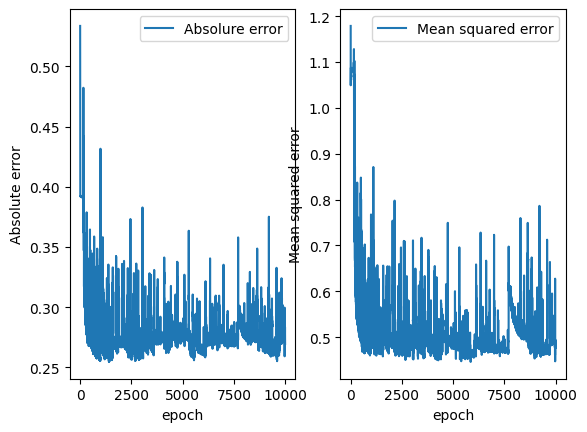

In [7]:
if PLOT_TRAIN:
    plt.figure()
    plt.subplot(121)
    plt.plot(loss)
    plt.ylabel('Absolute error')
    plt.xlabel('epoch')
    plt.legend(['Absolure error'])
    plt.subplot(122)
    plt.plot(mean_error)
    plt.ylabel('Mean squared error')
    plt.xlabel('epoch')
    plt.legend(['Mean squared error'])
    plt.show()

In [8]:
# Run the model on the test data
y_pred_norm = model.predict(x_test_norm)
 
# Reverse the normalization of the labels
y_pred = y_pred_norm*ystd1 + ymean1
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_norm)


15/15 [==============================] - 0s 7ms/step


15/15 [==============================] - 0s 7ms/step - loss: 1.9780 - mean_squared_error: 9.3335


In [16]:
print(test_loss)

1.9779714345932007


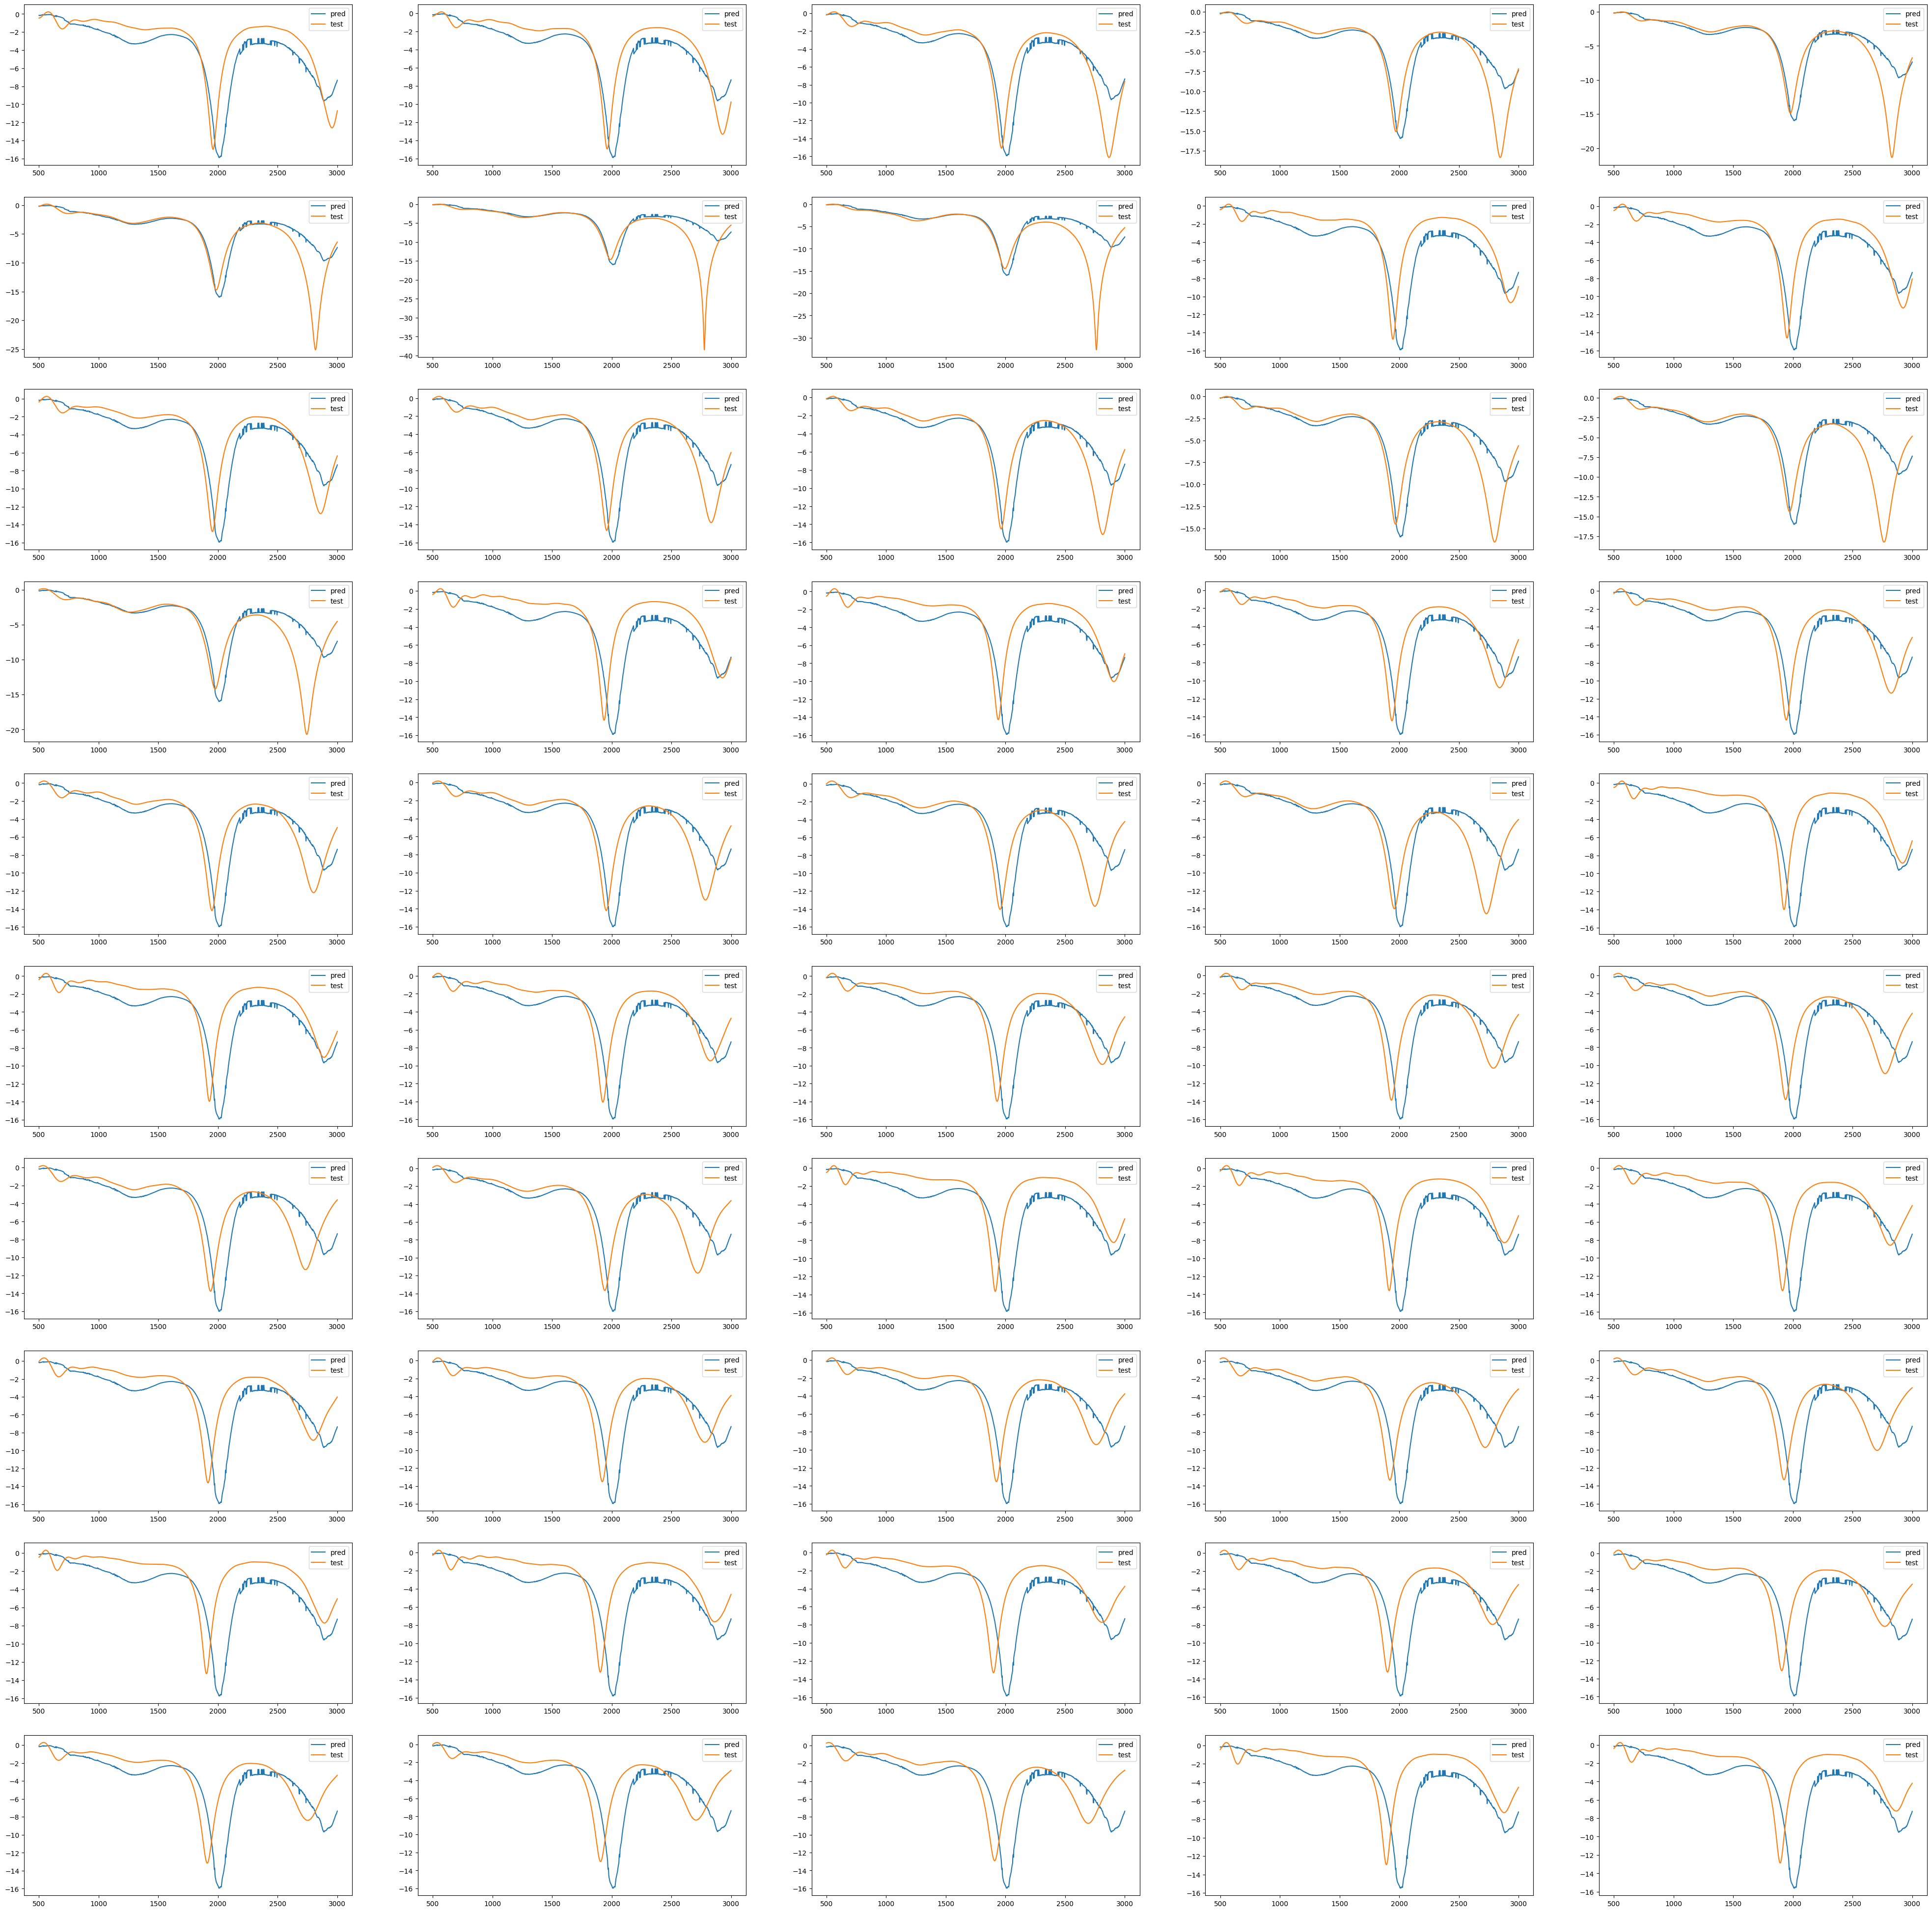

In [9]:

#Plot the results
if PLOT_TEST:
    plt.figure(figsize=(50, 50))
    for i in range(50):
        plt.subplot(10, 5, i+1)
        plt.plot(frequency,y_pred[i])
        plt.plot(frequency,y_test[i])
        plt.legend(['pred', 'test'])
plt.show()